In [71]:
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
df_vus = pd.read_csv("vus.csv", comment="#")
df_vus["time"] = pd.to_datetime(df_vus["_time"], utc=True, format="ISO8601")
df_vus["value"] = pd.to_numeric(df_vus["_value"], errors="coerce").fillna(0.0)
df_vus = df_vus[["time", "value"]].sort_values("time")
t0 = df_vus["time"].iloc[0]
df_vus["elapsed_minute"] = (df_vus["time"] - t0).dt.total_seconds() / 60.0

df_rt = pd.read_csv("rt.csv", comment="#")
df_rt["time"] = pd.to_datetime(df_rt["_time"], utc=True, format="ISO8601")
df_rt["value"] = pd.to_numeric(df_rt["_value"], errors="coerce").fillna(0.0)
df_rt = df_rt[["time", "value", "deployment"]].sort_values("time")
df_rt["deployment"] = df_rt["deployment"].replace({"test-flask-app": "RL Based", "hpa-flask-app": "HPA Default Based"})
t0 = df_rt["time"].iloc[0]
df_rt["elapsed_minute"] = (df_rt["time"] - t0).dt.total_seconds() / 60.0

df_replica = pd.read_csv("replica.csv", comment="#")
df_replica["time"] = pd.to_datetime(df_replica["_time"], utc=True, format="ISO8601")
df_replica["value"] = pd.to_numeric(df_replica["_value"], errors="coerce").fillna(0.0)
df_replica = df_replica[["time", "value", "deployment"]].sort_values("time")
df_replica["deployment"] = df_replica["deployment"].replace({"test-flask-app": "RL Based", "hpa-flask-app": "HPA Default Based"})
t0 = df_replica["time"].iloc[0]
df_replica["elapsed_minute"] = (df_replica["time"] - t0).dt.total_seconds() / 60.0

df_cpu = pd.read_csv("cpu.csv", comment="#")
df_cpu["time"] = pd.to_datetime(df_cpu["_time"], utc=True, format="ISO8601")
df_cpu["value"] = pd.to_numeric(df_cpu["_value"], errors="coerce").fillna(0.0)
df_cpu = df_cpu[["time", "value", "deployment"]].sort_values("time")
df_cpu["deployment"] = df_cpu["deployment"].replace({"test-flask-app": "RL Based", "hpa-flask-app": "HPA Default Based"})
t0 = df_cpu["time"].iloc[0]
df_cpu["elapsed_minute"] = (df_cpu["time"] - t0).dt.total_seconds() / 60.0

df_memory = pd.read_csv("memory.csv", comment="#")
df_memory["time"] = pd.to_datetime(df_memory["_time"], utc=True, format="ISO8601")
df_memory["value"] = pd.to_numeric(df_memory["_value"], errors="coerce").fillna(0.0)
df_memory = df_memory[["time", "value", "deployment"]].sort_values("time")
df_memory["deployment"] = df_memory["deployment"].replace({"test-flask-app": "RL Based", "hpa-flask-app": "HPA Default Based"})
t0 = df_memory["time"].iloc[0]
df_memory["elapsed_minute"] = (df_memory["time"] - t0).dt.total_seconds() / 60.0

df_error = pd.read_csv("error.csv", comment="#")
df_error["time"] = pd.to_datetime(df_error["_time"], utc=True, format="ISO8601")
df_error["value"] = pd.to_numeric(df_error["_value"], errors="coerce").fillna(0.0)
df_error["deployment"] = df_error["name"].str.extract(r"http://([^/]+)/")[0]
df_error["deployment"] = df_error["deployment"].replace({
    "10.34.4.197": "RL Based",
    "10.34.4.200": "HPA Default Based"
})
df_error = df_error[["time", "value", "endpoint", "error", "error_code", "deployment"]].sort_values("time")
t0 = df_error["time"].iloc[0]
df_error["elapsed_minute"] = (df_error["time"] - t0).dt.total_seconds() / 60.0

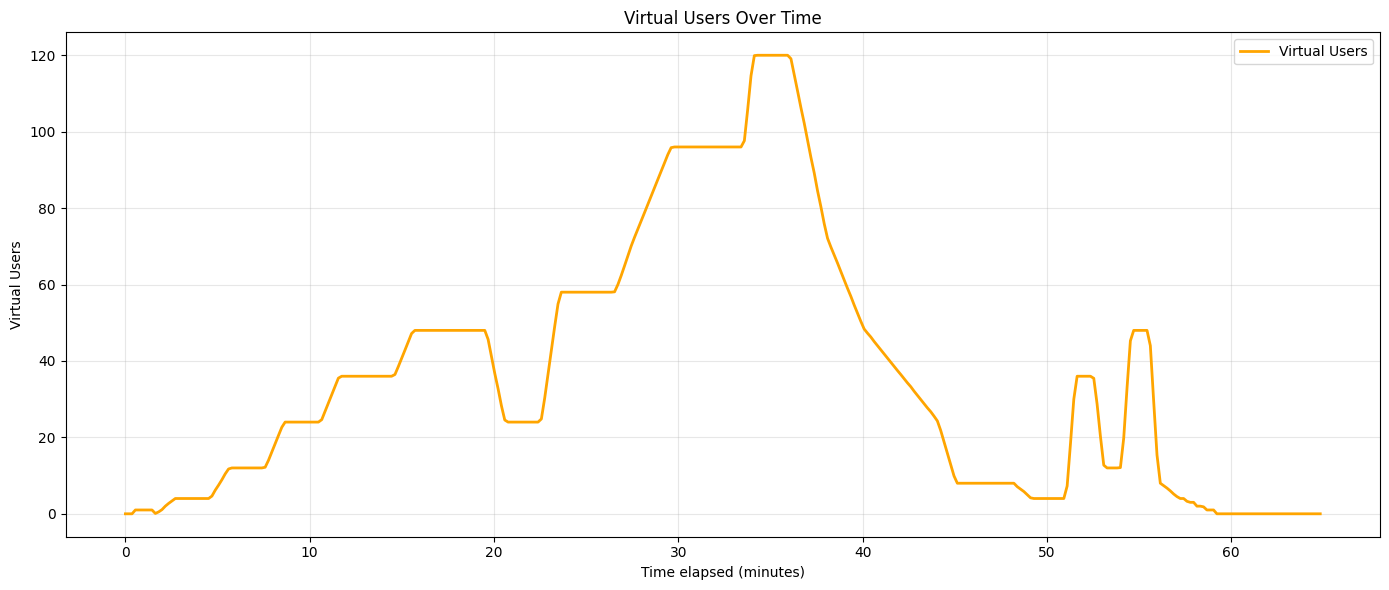

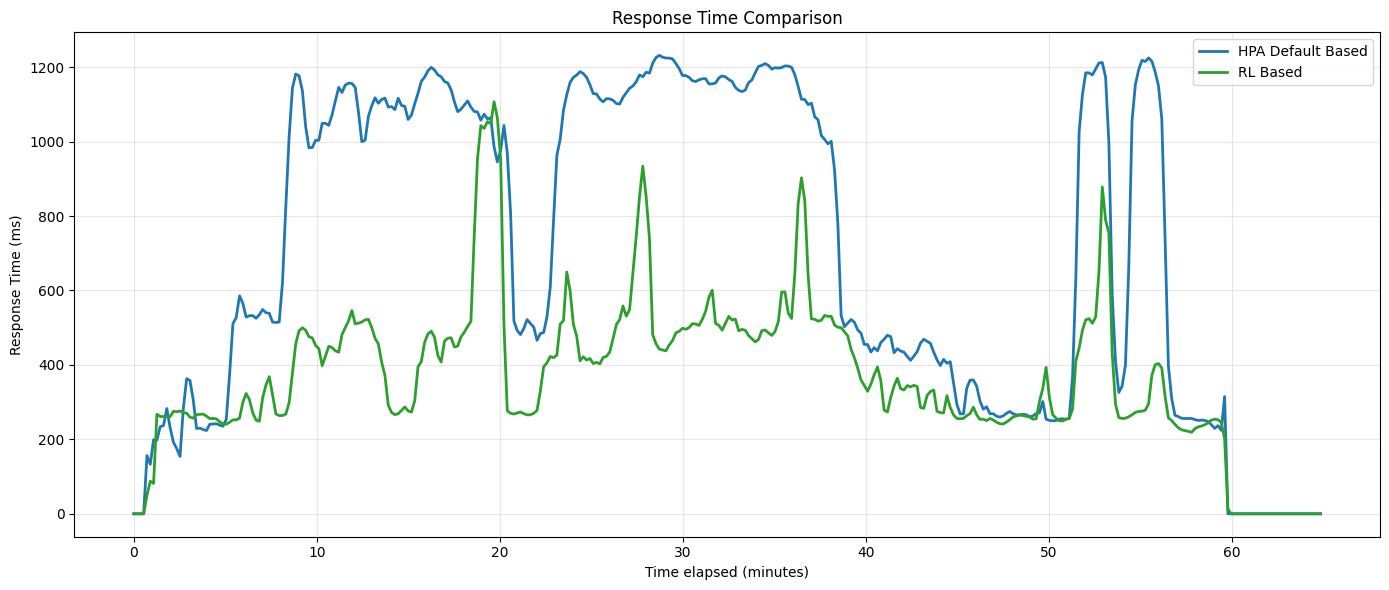

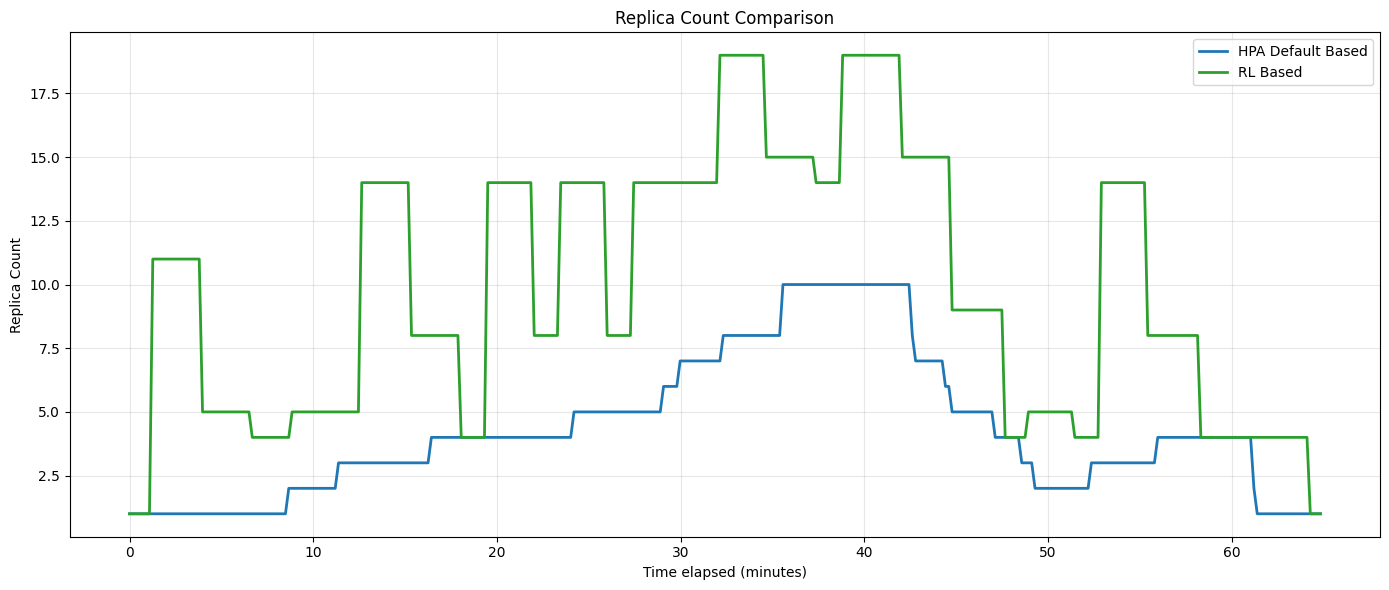

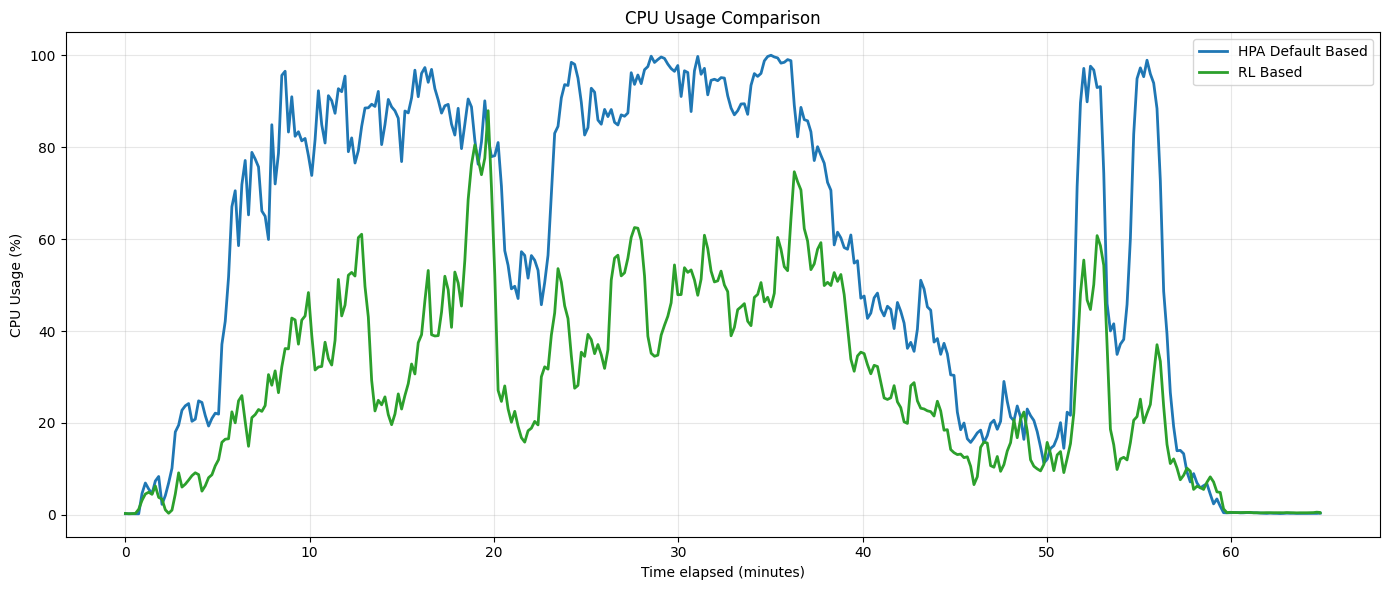

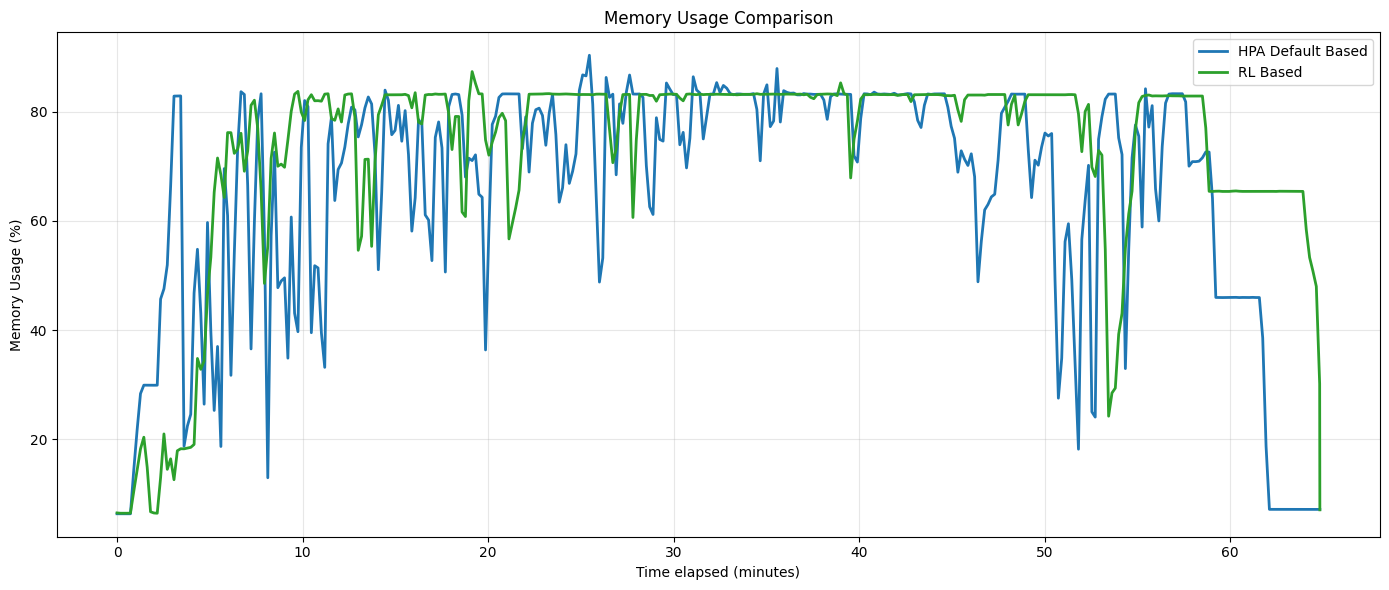

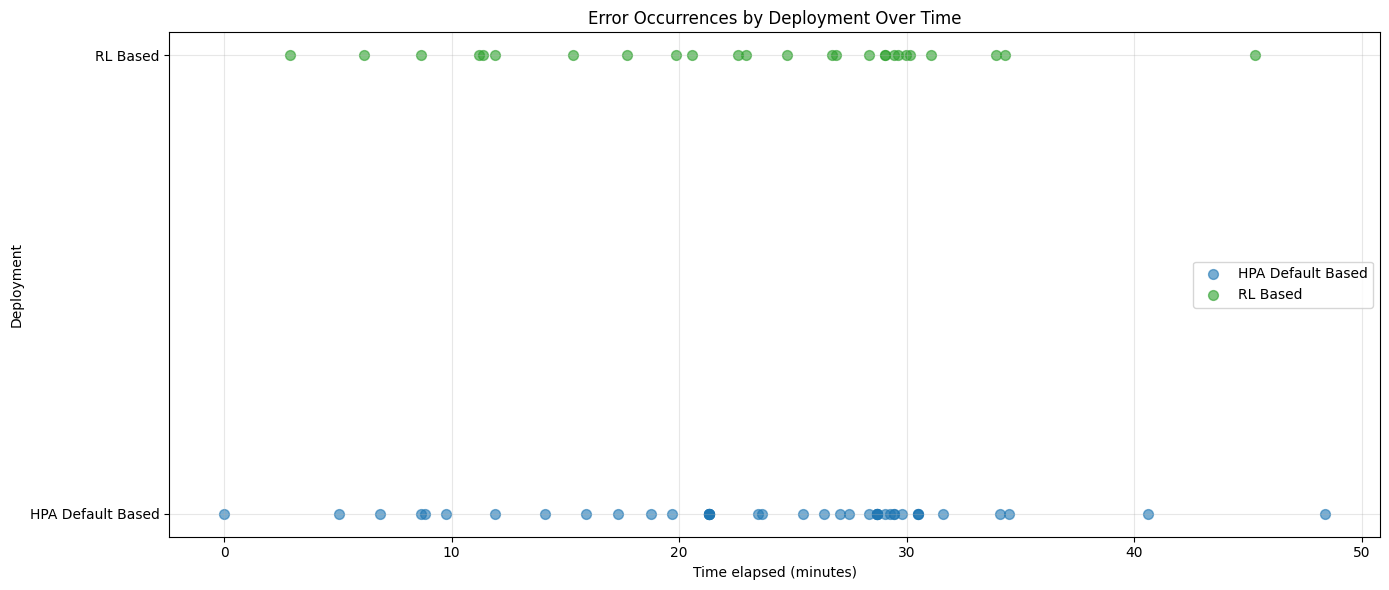

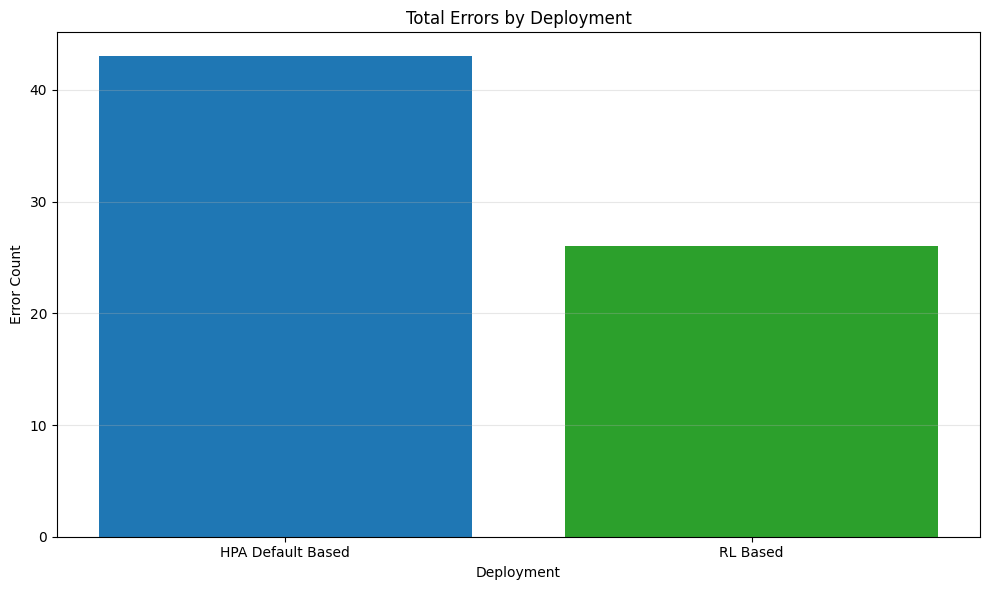

<Figure size 1400x600 with 0 Axes>

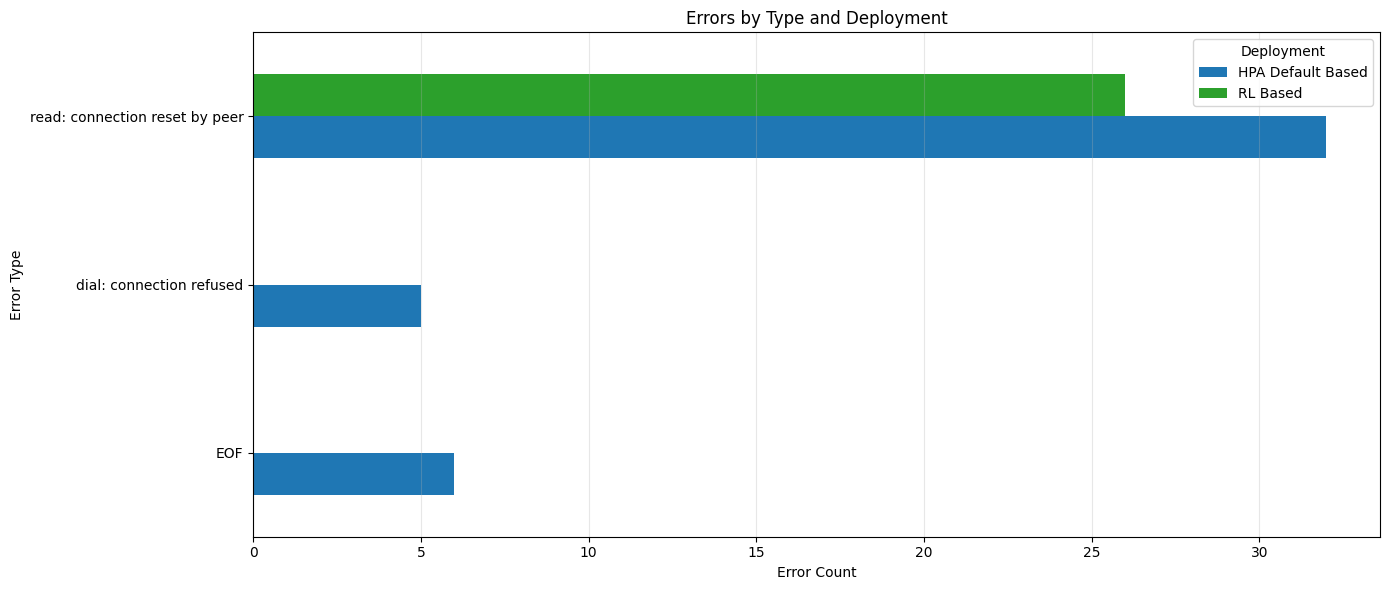

In [73]:
# ===============================================================================
plt.figure(figsize=(14, 6))
plt.plot(
    df_vus["elapsed_minute"],
    df_vus["value"],
    label="Virtual Users",
    linewidth=2,
    color="orange",
)

plt.xlabel("Time elapsed (minutes)")
plt.ylabel("Virtual Users")
plt.title("Virtual Users Over Time")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================================
plt.figure(figsize=(14, 6))
colors = ["#1f77b4", "#2ca02c"]
for deployment in df_rt["deployment"].unique():
    df_temp = df_rt[df_rt["deployment"] == deployment]
    plt.plot(df_temp["elapsed_minute"], df_temp["value"], label=deployment, linewidth=2,
             color=colors.pop(0))

plt.xlabel("Time elapsed (minutes)")
plt.ylabel("Response Time (ms)")
plt.title("Response Time Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================================
plt.figure(figsize=(14, 6))
colors = ["#1f77b4", "#2ca02c"]
for deployment in df_replica["deployment"].unique():
    df_temp = df_replica[df_replica["deployment"] == deployment]
    plt.plot(df_temp["elapsed_minute"], df_temp["value"], label=deployment, linewidth=2,
            color=colors.pop(0))

plt.xlabel("Time elapsed (minutes)")
plt.ylabel("Replica Count")
plt.title("Replica Count Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================================
plt.figure(figsize=(14, 6))
colors = ["#1f77b4", "#2ca02c"]
for deployment in df_cpu["deployment"].unique():
    df_temp = df_cpu[df_cpu["deployment"] == deployment]
    plt.plot(
        df_temp["elapsed_minute"],
        df_temp["value"],
        label=deployment,
        linewidth=2,
        color=colors.pop(0),
    )

plt.xlabel("Time elapsed (minutes)")
plt.ylabel("CPU Usage (%)")
plt.title("CPU Usage Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================================
plt.figure(figsize=(14, 6))
colors = ["#1f77b4", "#2ca02c"]
for deployment in df_memory["deployment"].unique():
    df_temp = df_memory[df_memory["deployment"] == deployment]
    plt.plot(
        df_temp["elapsed_minute"],
        df_temp["value"],
        label=deployment,
        linewidth=2,
        color=colors.pop(0),
    )

plt.xlabel("Time elapsed (minutes)")
plt.ylabel("Memory Usage (%)")
plt.title("Memory Usage Comparison")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================================
plt.figure(figsize=(14, 6))
colors = ["#1f77b4", "#2ca02c"]
for i, deployment in enumerate(df_error["deployment"].unique()):
    df_temp = df_error[df_error["deployment"] == deployment]
    plt.scatter(
        df_temp["elapsed_minute"],
        [i] * len(df_temp),
        alpha=0.6,
        s=50,
        label=deployment,
        color=colors[i % len(colors)],
    )

plt.xlabel("Time elapsed (minutes)")
plt.ylabel("Deployment")
plt.yticks(range(len(df_error["deployment"].unique())), df_error["deployment"].unique())
plt.title("Error Occurrences by Deployment Over Time")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ===============================================================================
plt.figure(figsize=(10, 6))
error_by_deployment = df_error.groupby("deployment")["value"].sum().sort_values(ascending=False)
plt.bar(error_by_deployment.index, error_by_deployment.values, color=["#1f77b4", "#2ca02c"])

plt.xlabel("Deployment")
plt.ylabel("Error Count")
plt.title("Total Errors by Deployment")
plt.grid(True, alpha=0.3, axis="y")
plt.tight_layout()
plt.show()

# ===============================================================================
plt.figure(figsize=(14, 6))
error_pivot = df_error.groupby(["error", "deployment"])["value"].sum().unstack(fill_value=0)
error_pivot.plot(kind="barh", stacked=False, color=["#1f77b4", "#2ca02c"], figsize=(14, 6))

plt.xlabel("Error Count")
plt.ylabel("Error Type")
plt.title("Errors by Type and Deployment")
plt.legend(title="Deployment")
plt.grid(True, alpha=0.3, axis="x")
plt.tight_layout()
plt.show()